# Linear Model

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### 1. Linear Regression

##### 1-1. The Normal Equation

In [10]:
import numpy as np

# 예제 코드
np.random.seed(42)
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)  # randn: rand와 다른 난수 생성

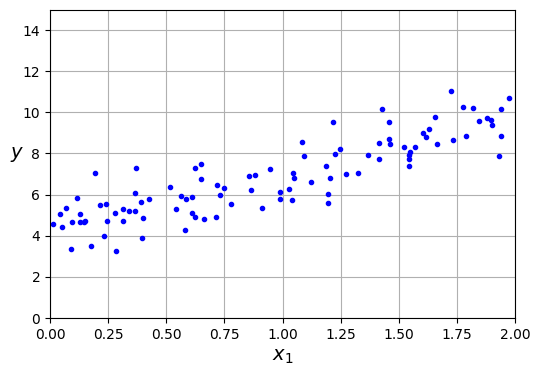

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])  # x_min, x_max, y_min, y_max
plt.grid()
plt.show()

In [12]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # 0열에 1 데이터 추가
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # @: 행렬 곱셈 연산자

[역행렬]
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>A</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mi>a</mi>
      <mi>d</mi>
      <mo>&#x2212;</mo>
      <mi>b</mi>
      <mi>c</mi>
    </mrow>
  </mfrac>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mtable columnspacing="1em" rowspacing="0.9em 0.9em">
      <mtr>
        <mtd>
          <mi>d</mi>
        </mtd>
        <mtd>
          <mo>&#x2212;</mo>
          <mi>b</mi>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mo>&#x2212;</mo>
          <mi>c</mi>
        </mtd>
        <mtd>
          <mi>a</mi>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>

In [13]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [14]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

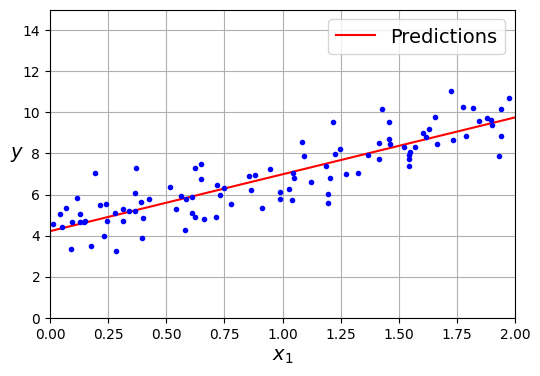

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [17]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [18]:
# 최소 제곱(least squares) 함수
# theta_hat = X†y
# X†: 유사역행렬(무어 펜로즈 역행렬)
# 역행렬은 full rank인 n x n 정방 행렬에서만 정의
# 정방 행렬이 아닌 모양의 행렬에서는 유사 역행렬을 정의
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)  
theta_best_svd

array([[4.21509616],
       [2.77011339]])

- 다음 4가지 조건을 만족하는 행렬 A†가 무어-펜로즈 유사 역행렬

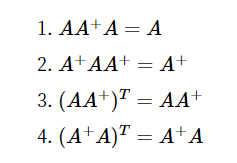

- 특이값 분해(SVD)를 이용하면 쉽게 계산할 수 있음

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>A</mi>
  <mo>=</mo>
  <mi>U</mi>
  <mi mathvariant="normal">&#x3A3;</mi>
  <msup>
    <mi>V</mi>
    <mi>T</mi>
  </msup>
</math>

- 여기서 U는 m X m 직각 행렬, V는 n X n 직각 행렬이므로 다음을 만족

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>U</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
  <mo>=</mo>
  <msup>
    <mi>U</mi>
    <mi>T</mi>
  </msup>
  <mo>,</mo>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <msup>
    <mi>V</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
  <mo>=</mo>
  <msup>
    <mi>V</mi>
    <mi>T</mi>
  </msup>
</math>

-  ∑ 표현

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi mathvariant="normal">&#x3A3;</mi>
  <mo>=</mo>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mtable columnspacing="1em" rowspacing="4pt">
      <mtr>
        <mtd>
          <msub>
            <mi mathvariant="normal">&#x3A3;</mi>
            <mi>r</mi>
          </msub>
        </mtd>
        <mtd>
          <msub>
            <mn>0</mn>
            <mrow data-mjx-texclass="ORD">
              <mi>r</mi>
              <mo>&#xD7;</mo>
              <mo stretchy="false">(</mo>
              <mi>n</mi>
              <mo>&#x2212;</mo>
              <mi>r</mi>
              <mo stretchy="false">)</mo>
            </mrow>
          </msub>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <msub>
            <mn>0</mn>
            <mrow data-mjx-texclass="ORD">
              <mo stretchy="false">(</mo>
              <mi>m</mi>
              <mo>&#x2212;</mo>
              <mi>r</mi>
              <mo stretchy="false">)</mo>
              <mo>&#xD7;</mo>
              <mi>r</mi>
            </mrow>
          </msub>
        </mtd>
        <mtd>
          <msub>
            <mn>0</mn>
            <mrow data-mjx-texclass="ORD">
              <mo stretchy="false">(</mo>
              <mi>m</mi>
              <mo>&#x2212;</mo>
              <mi>r</mi>
              <mo stretchy="false">)</mo>
              <mo>&#xD7;</mo>
              <mo stretchy="false">(</mo>
              <mi>n</mi>
              <mo>&#x2212;</mo>
              <mi>r</mi>
              <mo stretchy="false">)</mo>
            </mrow>
          </msub>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>

- 유사 역행렬

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>A</mi>
    <mo>+</mo>
  </msup>
  <mo>=</mo>
  <mi>V</mi>
  <msup>
    <mi mathvariant="normal">&#x3A3;</mi>
    <mo>+</mo>
  </msup>
  <msup>
    <mi>U</mi>
    <mi>T</mi>
  </msup>
</math>

- 정규 방적식보다 효율적이며 특정한 경우 정규방정식이 작동하지 않으나 유사역행렬은 항상 구할 수 있음

In [19]:
# 유사 역행렬 pinv
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

##### 1-2. 계산 복잡도
- 정규방정식은 (n+1) X (n+1) 크기의 (X_transpose @ X) 역행렬 계산
- 역행렬 계산 복잡도는 일반적으로 O(n^2.4), O(n^3)사이
- 즉 특성 수가 두 배로 늘어나면 시간 계산이 5.3에서 8배 늘어남
- 사이킷런의 LinearRegression의 경우 SVD방법이 약 O(n^2)
- 정규방정식과 SVD 방법 모두 특성 수가 많아지면 매우 느려짐

### 2. Gradient Descent
- 경사 하강법(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 적절한 learning rate

- 문제
    - 전역 최솟값보다 덜 좋은 지역 최솟값 수렴 문제
    - 모든 특성이 같은 스케일을 가져야 함(시간 문제)

- 다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수
- 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 의미

##### 2-1. Batch Gradient Descent
- 경사 하강법을 구현하려면 각 모델 파라미터에 대해 비용 함수의 그레이디언트를 계산(편도함수)

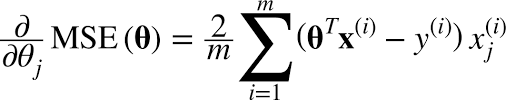

- 비용 함수의 그레이디언트 벡터

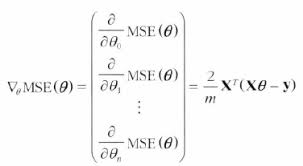

[CAUTION]
- 이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산
- 그래서 이 알고리즘을 배치 경사 하강법이라고 부름
- 이런 이유로 매우 큰 훈련 세트에서는 아주 느림
- 그러나 경사 하강법은 특성 수에 민감하지 않음
- 수십만 개의 특성에서 선형 회귀를 훈련시키려면 
- 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠름

In [20]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)  # 초기 파라미터 설정

for epochs in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [21]:
theta

array([[4.21509616],
       [2.77011339]])

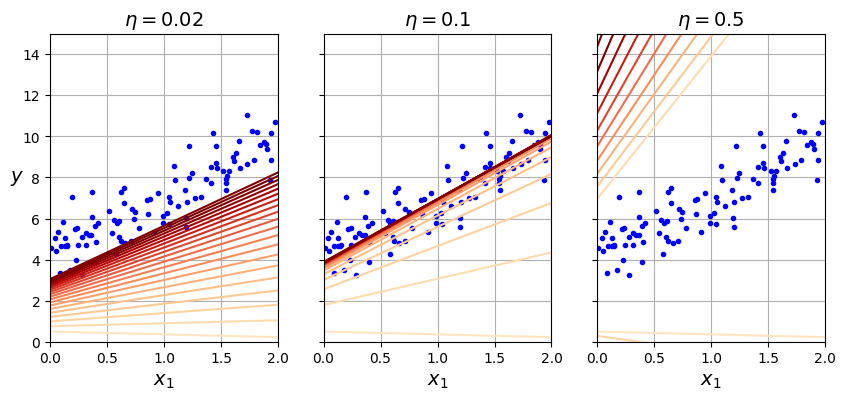

In [22]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle='solid', color=color)

        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel('$x_1$')
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr'$\eta = {eta}$')
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  #

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

- 왼쪽은 학습률이 너무 낮아 최적점에 도달하려면 시간이 오래 걸림
- 가운데는 학습률이 적당해 보임
- 오른쪽은 학습률이 높아서 발산

##### 2-2. Stochastic Gradient Desent
- 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 점
- SGD는 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트 계산
- 알고리즘이 훨씬 빠르며 매우 큰 훈련 세트도 훈련시킬 수 있음
- 반면, 확률적(무작위)이므로 배치 경사 하강법보다 훨씬 불안정함
- 비용 함수가 최솟값에 다다를 때까지 위아래로 요동치며 평균적으로 감소
- 시간이 지나면 요동이 지속되면서 최솟값의 근사치에 도달
- 최적치가 아니지만 지역 최솟값에서 탈출을 시켜주지만 전역 최솟값에 다다르지는 못함
- 이를 해결하기 위해 시작할 때는 학습률을 크게 하고 점차 작게 줄여나감
- 담금질 기법 알고리즘과 유사
- 매 반복에서 학습률을 결정하는 함수를 학습 스케줄
- 학습률이 너무 빨리 줄면 지역 최솟값에 갇히거나 중간에 멈춰버림
- 학습률이 너무 천천히 줄면 오랫동안 최솟값 근처를 맴돌거나 훈련을 너무 일찍 중지할 수 있음

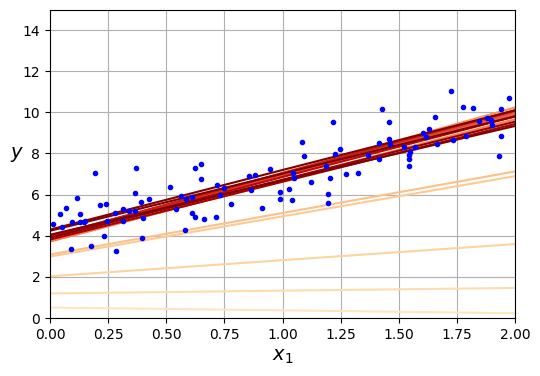

In [23]:
# SGD 구현
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

# figure
theta_path_sgd = []
n_shown = 20
plt.figure(figsize=(6,4))

for epoch in range(n_epochs):
    for iteration in range(m):

        # generate figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @  theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

- 경사 하강법의 첫 20개 스텝

In [24]:
theta

array([[4.21076011],
       [2.74856079]])

- 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에 여러번 선택되거나 선택되지 못 할 수도 있음
- 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞어야 함
- 그러나 이렇게 하면 보통 더 늦게 수렴

[CAUTION]
- 확률적 경사 하강법은 훈련 샘플이 IID(independent and identically distributed)를 만족해야 평균적으로 파라미터가 전역 최적점을 향해 진행
- 훈련 샘플을 섞기
- 만약 레이블 순서대로 정렬된 샘플을 섞지 않은 채 사용하면 한 레이블에 최적화하고 두 번째 레이블에 최적화하며 최적점에 도달하지 못 함

In [25]:
# 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면
# 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
# 최대 1000번 실행되며
# 한 에포크에서 0.001보다 손실이 줄어들 때까지 실행
# 학습률 0.1로 기본 학습 스케줄 사용
# 규제는 사용하지 않음 

sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

##### 2-3. Mini-batch Gradient Descent

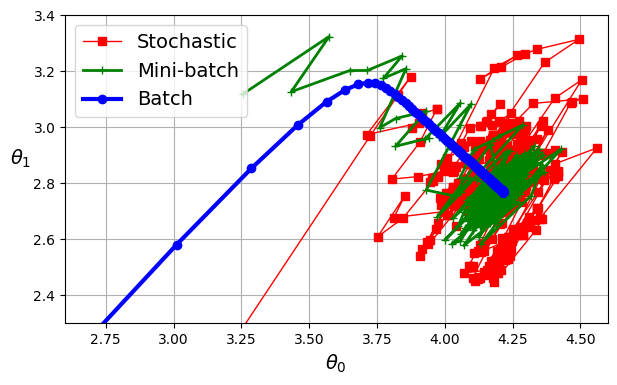

In [27]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)  # 0부터 m까지 인덱스 무작위로 섞기
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

### 3. Polynomial Regression

In [28]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

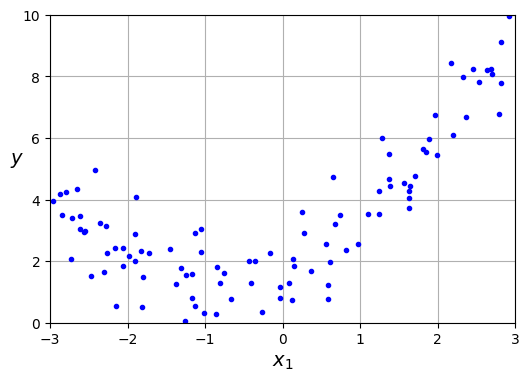

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures

# degree: 생성할 다항식의 최고 차수
# include_bias: 상수항을 생성할지 여부
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
# X가 [a, b] 형태의 1차원 배열일 때
# 2차원 다항식을 생성하면 [a, b, a^2, b^2]과 같은 형태의 다항식 특성 생성
X[0]

array([-0.75275929])

In [31]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

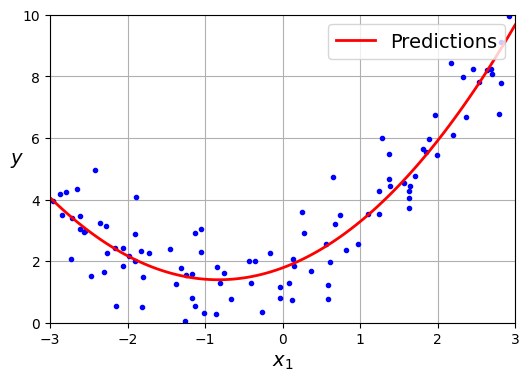

In [33]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)  # linspace: 주어진 구간에 등간격으로 나눈 값을 생성
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper right')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

### 4. 학습 곡선

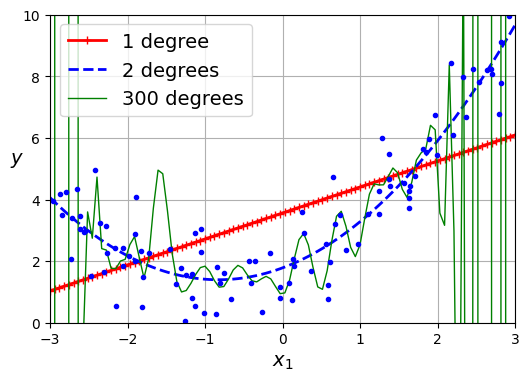

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6,4))

for style, width, degree in (('r-+', 2, 1), ('b--', 2, 2), ('g-', 1, 300)):
    polybig_feature = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_feature, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

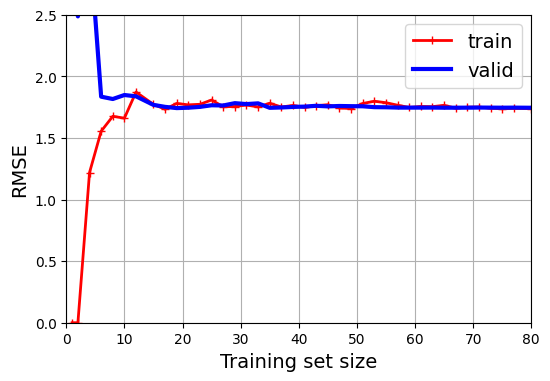

In [35]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), 
                                                         X, 
                                                         y, 
                                                         train_sizes=np.linspace(0.01, 1.0, 40),
                                                         cv=5, 
                                                         scoring='neg_root_mean_squared_error')

# np.linspace(0.01, 1, 40): 데이터의 1%부터 100%까지 40단계로 나누어 사용
# sciki-learn의 교차 검증 점수는 더 높을 수록 좋은 성능으로 인식하므로
# 점수가 낮을 수록 좋은 RMSE, MSE의 값은 음수로 표현

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.axis([0, 80, 0, 2.5])
plt.show()

- RMSE의 값이 1.8정도에서 형성되어 있으므로 과소적합 되어 있음.
- 과소적합을 해결하기 위해서는 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 함.


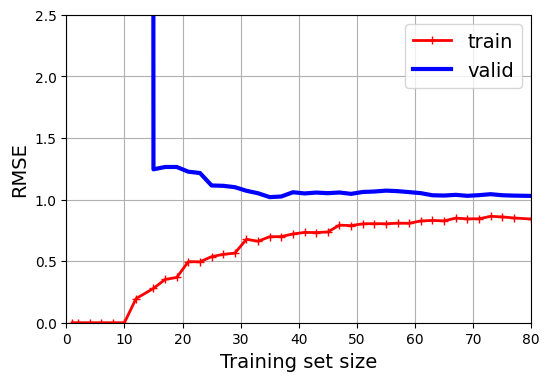

In [36]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, 
                                                         X,
                                                         y, 
                                                         train_sizes=np.linspace(0.01, 1, 40), 
                                                         cv=5, 
                                                         scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.legend(loc='upper right')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()


- RMSE의 값이 이전 모델보다 낮아짐

- train data에서 RMSE의 값이 더 낮고, valid data와 차이를 보이므로 과대적합 의심
- 편향-분산 trade off
    - 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어듦
    - 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아짐

### 5. 규제가 있는 선형 모델
- 과대적합을 감소시키는 방법 중 하나는 모델을 규제하는 것

##### 5-1. 릿지 회귀
- 릿지 회귀 또는 티호노프 규제

- 규제항을 비용 함수에 추가

- 규제항은 훈련하는 동안에만 비용 함수에 추가되며, 훈련이 끝나면 규제가 없는 지표로 성능 평가

- 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요

- 릿지 회귀의 비용 함수

![비용 함수](https://blog.kakaocdn.net/dn/phZk0/btq3DwvcSNQ/zyrunIPkBktf0S3i0kQ0fK/img.png)

In [37]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

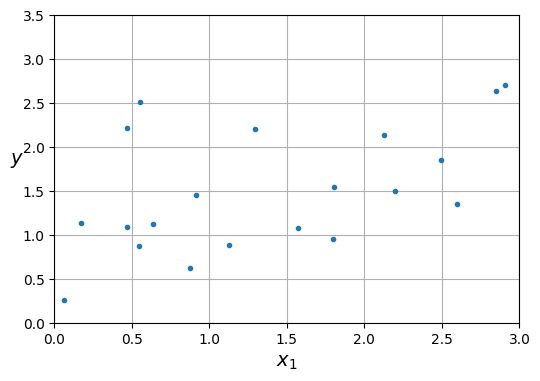

In [38]:
plt.figure(figsize=(6,4))
plt.plot(X, y, '.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [39]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

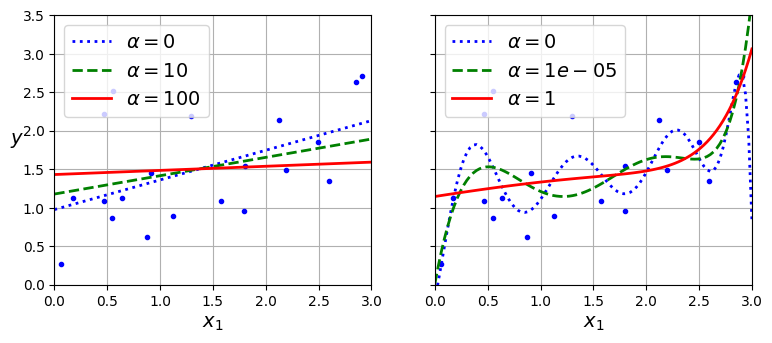

In [40]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, 'b.', linewidth=3)
    for alpha, style in zip(alphas, ('b:', 'g--', 'r-')):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(), 
                model)
            
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2, 
                 label=fr'$\alpha = {alpha}$')
        plt.legend(loc='upper left')
        plt.xlabel('$x_1$')
        plt.axis([0, 3, 0, 3.5])
        plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel('$y$', rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [41]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')  # penalty: 규제
                                      # l2: 비용 함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항 추가
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46619232])

##### 5-2. 라쏘 회귀
- least absolute shrinkage and selection operator(Lasso)

- 덜 중요한 특성의 가중치를 제거함(가중치가 0이 되도록)

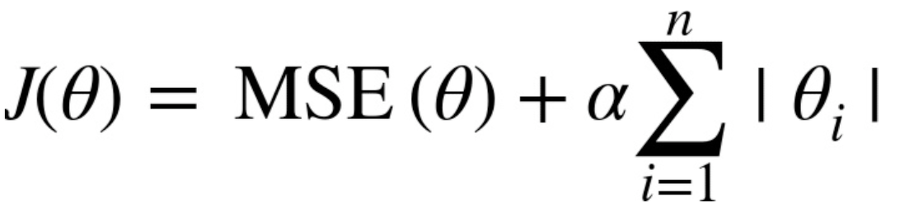

In [42]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

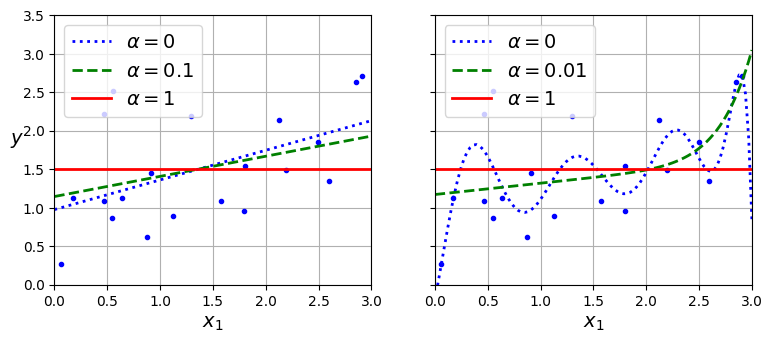

In [43]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel('$y$', rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

- 오른쪽 그래프의 alpha=1e-2는 3차 방정식처럼 보임
- 차수가 높은 다항 특성의 가중치를 모두 0으로 만듦
- 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만듦

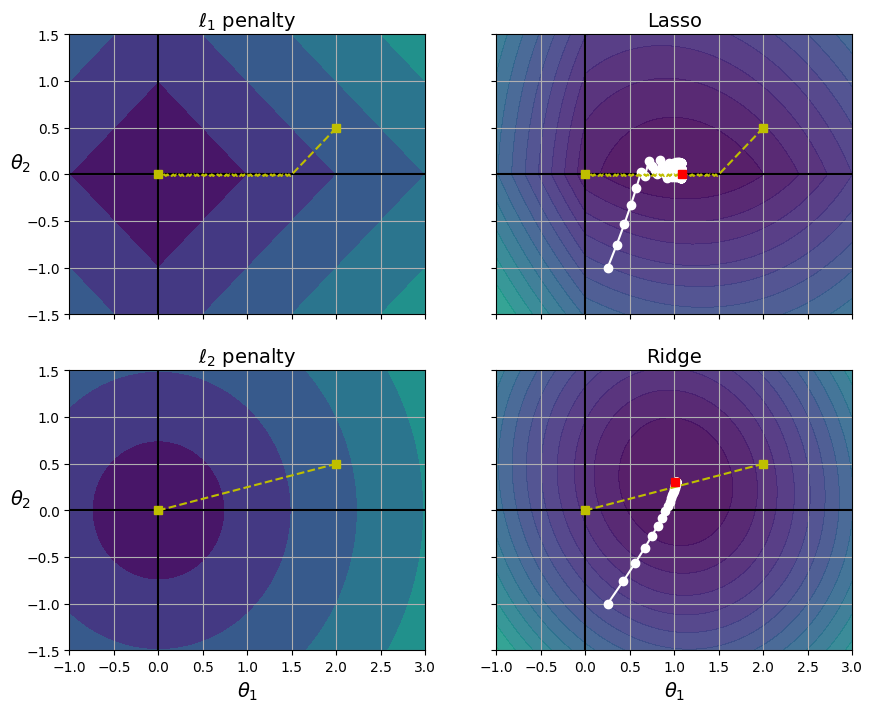

In [44]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

plt.show()

- 라쏘 비용 함수는 theta_i=0에서 미분가능하지 않음
- theta_i=0일 때 서브그레이디언트 벡터를 사용하면 경사 하강법을 적용하는데 문제 없음

##### 5-3. 엘라스틱넷(Elastic net)

- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 라쏘를 더해서 사용하며 혼합 정도는 r을 사용해 조절
- r=0이면 릿지와, r=1이면 라쏘와 같음

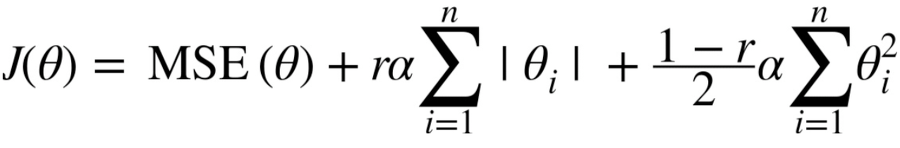

In [45]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

- 각 규제는 릿지가 기본이 되지만 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 나음

- 이 모델들은 불필요한 특성의 가중치를 0으로 만들어주기 때문
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제이므로 엘라스틱넷

##### 5-4. 조기 종료

- 에포크가 진행됨에 따라 검증 에러가 상승하기 시작하는(과대적합 시작 지점)에서 훈련을 멈추는 것
- 일정 횟수 이상 검증 에러가 상승한다면 훈련을 멈추고 검증 에러가 최소였을 때로 파라미터 업데이트

c:\Users\magic\anaconda3\envs\HOML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\magic\anaconda3\envs\HOML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\magic\anaconda3\envs\HOML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\magic\anaconda3\envs\HOML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calcula

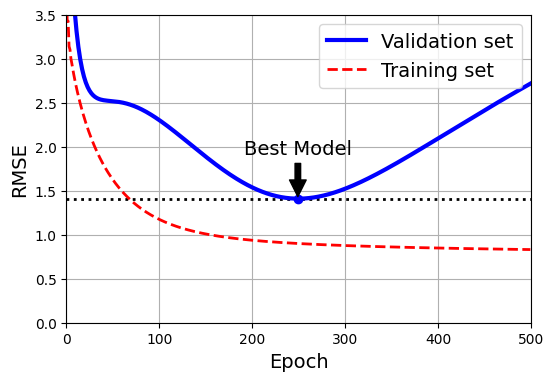

In [46]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), 
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs=500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)  # 학습 1회 진행
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
    
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6,4))
plt.annotate('Best Model', 
             xy=(best_epoch, best_valid_rmse), 
             xytext=(best_epoch, best_valid_rmse + 0.5), 
             ha='center', 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], 'k:', linewidth=2)
plt.plot(val_errors, 'b-', linewidth=3, label='Validation set')
plt.plot(best_epoch, best_valid_rmse, 'bo')
plt.plot(train_errors, 'r--', linewidth=2, label='Training set')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

### 6. 로지스틱 회귀

- 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산하고 편향을 더함
- 결괏값을 바로 출력하지 않고 로지스틱을 출력
- 시그모이드 함수

##### 6-1. 확률 추정

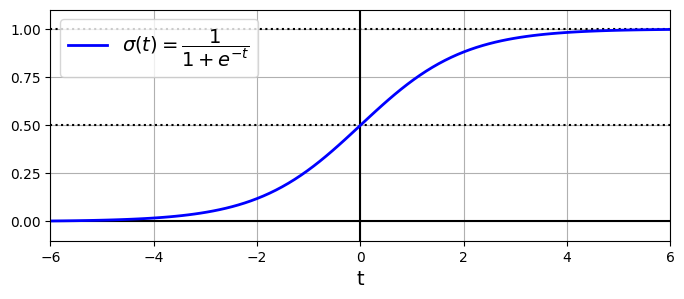

In [47]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8,3))
plt.plot([-lim, lim], [0, 0], 'k-')
plt.plot([-lim, lim], [0.5, 0.5], 'k:')
plt.plot([-lim, lim], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth=2, label=r'$\sigma(t) = \dfrac{1}{1 + e^{-t}}$')
plt.xlabel('t')
plt.legend(loc='upper left')
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

##### 6-2. 비용 함수

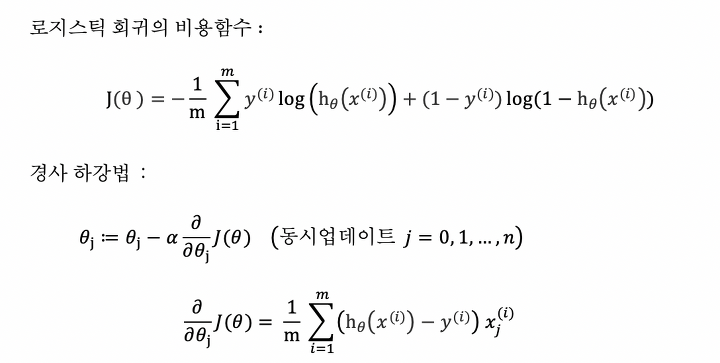

##### 6-3. 결정 경계

In [48]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [49]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [50]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [51]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, t_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

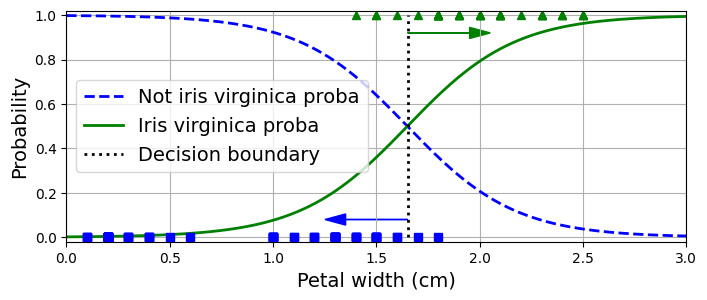

In [54]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]  # 0.5이상의 값을 가지는 초기의 값 => 결정 경계

plt.figure(figsize=(8,3))
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label='Not iris virginica proba')
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris virginica proba')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2, label='Decision boundary')

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.plot(X_train[y_train==0], y_train[y_train==0], 'bs')
plt.plot(X_train[y_train==1], y_train[y_train==1], 'g^')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(loc='center left')
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

In [ ]:
decision_boundary

1.6516516516516517

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

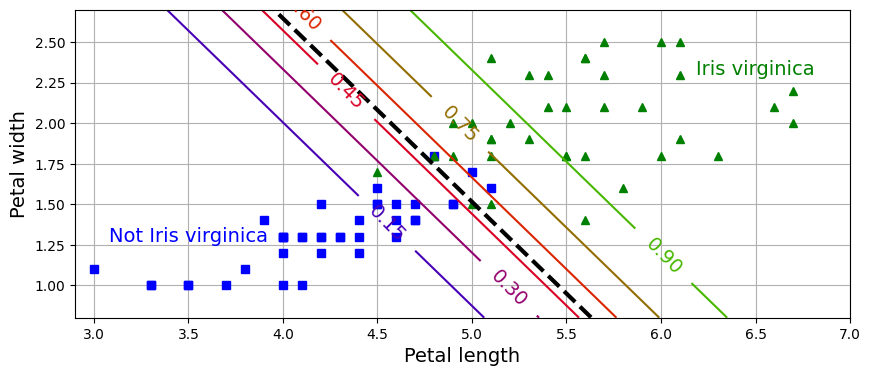

In [55]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

##### 6-4. 소프트맥스 회귀

- 로지스틱 회귀 모델은 직접 다중 클래스를 지원하도록 일반화 될 수 있음
- 이를 소프트맥스 회귀, 다항 로지스틱 회귀라고 함

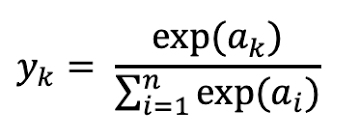

In [56]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)  # C: l_2 norm 규제
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [57]:
softmax_reg.predict([[5, 2]])

array([2])

In [58]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

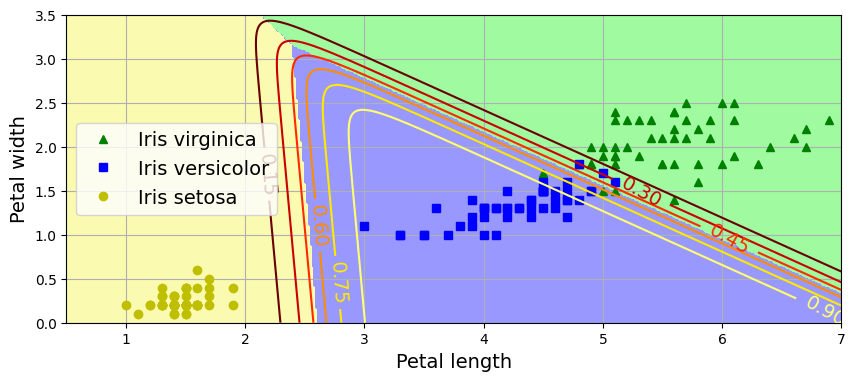

In [63]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1), np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris setosa')

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap='hot') 
plt.clabel(contour, inline=1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='center left')
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()